<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/multi_variable_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sequential API 

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD

import numpy as np

In [ ]:
# Data load
data = np.loadtxt('./TF2_Example_1.csv', delimiter=',', dtype=np.float32)
print(data, data.shape)

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]
 [ 3.  1.  0.  3.]
 [ 2.  4.  2. -4.]
 [ 4.  1.  2.  9.]
 [-1.  3.  2. -7.]
 [ 4.  3.  3.  5.]
 [ 0.  2.  6.  6.]
 [ 2.  2.  1.  0.]
 [ 1. -2. -2.  4.]
 [ 0.  1.  3.  3.]
 [ 1.  1.  3.  5.]
 [ 0.  1.  4.  5.]
 [ 2.  3.  3.  1.]] (15, 4)


In [ ]:
X_train = data[ : , :3]
y_train = data[ :, -1]
print(X_train.shape, y_train.shape)

(15, 3) (15,)


Sequential model

In [ ]:
# modeling : init W&b
model = Sequential() # 모델
 
model.add( Dense(1, input_shape = (3, ), activation = 'linear') ) # input & hidden layer

In [ ]:
# Define loss & y
model.compile( optimizer = SGD(learning_rate = 1e-2), loss = 'mse')
model.summary() # w=3, b=1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# learning

from datetime import datetime 

start_time = datetime.now()

hist = model.fit(X_train, y_train, epochs = 1000)

end_time = datetime.now()
print( '\nElapsed Time => ', end_time-start_time)

Epoch 1/1000
1/1 [==============================] - 1s 548ms/step - loss: 59.8299
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 37.6122
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 26.1797
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 20.1034
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 16.7010
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 14.6459
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 13.2809
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 12.2796
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 11.4788
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 10.7964
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.1901
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 9.6378
Epoch 13/1000
1/1 [=================

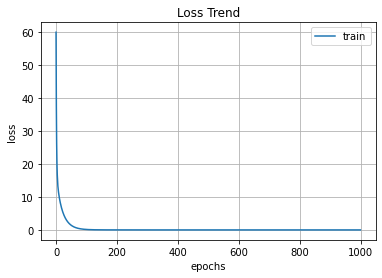

In [ ]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train')
plt.legend(loc='best')

plt.show()

# 이렇게 값이 0으로 쭉~ 수렴해야 좋은 그래프! 

In [ ]:
# Prediction

X_test = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

y_test = [ 2*data[0] -3*data[1] + 2*data[2] for data in X_test ] 

prediction_val = model.predict( np.array(X_test) )

print(prediction_val)
print('='*20)
print(y_test)

[[-5.0007997]
 [-2.9997706]
 [-3.9980123]
 [ 8.997697 ]
 [ 7.0012136]]
[-5, -3, -4, 9, 7]


In [ ]:
# 모델 입력, 출력, 가중치 확인
print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9997643],
       [-3.000242 ],
       [ 1.9998373]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00158933], dtype=float32)>]


## Functional API

Functional model

In [ ]:
# Linear Regression을 keras 이용하여 생성

input_ = Input(shape = (3,))

# x = Dense(1, activation = 'linear')

output_ = Dense(1, activation = 'linear')(input_)

model = Model(inputs = input_, outputs = output_)

In [ ]:
# Compile : init W & b
model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# learning
start_time = datetime.now()

hist = model.fit(X_train, y_train, epochs=1000)

end_time = datetime.now()
print('\nElapsed Time => ', start_time-end_time)

Epoch 1/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.8320e-07
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.7905e-07
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.7494e-07
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.7091e-07
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.6696e-07
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.6286e-07
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.5892e-07
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.5519e-07
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.5128e-07
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.4742e-07
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.4381e-07
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.4025

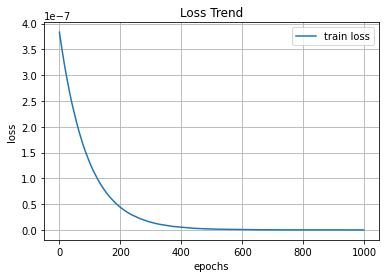

In [ ]:
# loss 시각화
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.legend(loc = 'best')

plt.show()

In [ ]:
# Prediction

X_test = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

y_test = [ 2*data[0] -3*data[1] + 2*data[2] for data in X_test ] 

prediction_val = model.predict( np.array(X_test) )

print(prediction_val)
print('='*20)
print(y_test)

[[-5.00001  ]
 [-3.0000021]
 [-3.99999  ]
 [ 8.999986 ]
 [ 7.0000095]]
[-5, -3, -4, 9, 7]
